Treball Data Science: Kiran Dhillon, Sergi Moros, Sara Requena, Julià Mestieri

Dataset: https://www.kaggle.com/unsdsn/world-happiness

## Descripción del negocio o dominio

 - Definición de los objetivos del proyecto y compresión de los requerimientos. Se trata de definir el problema al que nos enfrentamos



## Load libraries and data

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import pycountry

In [86]:
years = [2015, 2016, 2017, 2018, 2019]
ds_15 = pd.read_csv('data/2015.csv').drop(['Standard Error'],axis=1)
ds_15.rename(columns={"Happiness Rank": "Rank","Happiness Score":"Score","Economy (GDP per Capita)":"GDP","Family":"Social support","Health (Life Expectancy)":"Healthy","Trust (Government Corruption)":"Trust"},inplace=True)  
ds_15.insert(0, "Year", 2015)

ds_16 = pd.read_csv('data/2016.csv').drop(['Lower Confidence Interval','Upper Confidence Interval'],axis=1)
ds_16.rename(columns={"Happiness Rank": "Rank","Happiness Score":"Score","Economy (GDP per Capita)":"GDP","Family":"Social support","Health (Life Expectancy)":"Healthy","Trust (Government Corruption)":"Trust"},inplace=True) 
ds_16.insert(0, "Year", 2016)

ds_17 = pd.read_csv('data/2017.csv').drop(['Whisker.high','Whisker.low'],axis=1)
ds_17.rename(columns={"Happiness.Rank": "Rank","Happiness.Score":"Score","Economy..GDP.per.Capita.":"GDP","Family":"Social support","Health..Life.Expectancy.":"Healthy","Trust..Government.Corruption.":"Trust","Dystopia.Residual":"Dystopia Residual"},inplace=True) 
ds_17.insert(0, "Year", 2017)
ds_17 = ds_17.join(ds_15.set_index('Country')['Region'], on='Country')

ds_18 = pd.read_csv('data/2018.csv')
ds_18.rename(columns={"Country or region": "Country", "Overall rank": "Rank","Score":"Score","GDP per capita":"GDP","Healthy life expectancy":"Healthy","Freedom to make life choices":"Freedom","Perceptions of corruption":"Trust"},inplace=True)
ds_18.insert(0, "Year", 2018)
ds_18 = ds_18.join(ds_15.set_index('Country')['Region'], on='Country')

ds_19 = pd.read_csv('data/2019.csv')
ds_19.rename(columns={"Country or region": "Country", "Overall rank": "Rank","GDP per capita":"GDP","Healthy life expectancy":"Healthy","Freedom to make life choices":"Freedom","Perceptions of corruption":"Trust"},inplace=True)
ds_19.insert(0, "Year", 2019)
ds_19 = ds_19.join(ds_15.set_index('Country')['Region'], on='Country')

df = pd.concat([ds_15, ds_16, ds_17, ds_18, ds_19], sort=True, ignore_index=True)

df

,Country,Dystopia Residual,Freedom,GDP,Generosity,Healthy,Rank,Region,Score,Social support,Trust,Year
0,Switzerland,2.51738,0.66557,1.39651,0.29678,0.94143,1,Western Europe,7.587,1.34951,0.41978,2015
1,Iceland,2.70201,0.62877,1.30232,0.43630,0.94784,2,Western Europe,7.561,1.40223,0.14145,2015
2,Denmark,2.49204,0.64938,1.32548,0.34139,0.87464,3,Western Europe,7.527,1.36058,0.48357,2015
3,Norway,2.46531,0.66973,1.45900,0.34699,0.88521,4,Western Europe,7.522,1.33095,0.36503,2015
4,Canada,2.45176,0.63297,1.32629,0.45811,0.90563,5,North America,7.427,1.32261,0.32957,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,NaN,0.55500,0.35900,0.21700,0.61400,152,Sub-Saharan Africa,3.334,0.71100,0.41100,2019
778,Tanzania,NaN,0.41700,0.47600,0.27600,0.49900,153,Sub-Saharan Africa,3.231,0.88500,0.14700,2019
779,Afghanistan,NaN,0.00000,0.35000,0.15800,0.36100,154,Southern Asia,3.203,0.51700,0.02500,2019
780,Central African Republic,NaN,0.22500,0.02600,0.23500,0.10500,155,Sub-Saharan Africa,3.083,0.00000,0.03500,2019


In [57]:
""" Adding external data. """
edf = pd.read_csv('data/wdidata.csv')


In [118]:
df['nuevoindicador'] = np.nan
df.head()

for index, row in df.iterrows():
    country_name = row['Country']
    year = row['Year']
    if year in years:
        mujeres_campo = edf.loc[(edf['Country Name'] == country_name) & (edf['Indicator Code'] == 'SL.AGR.EMPL.FE.ZS')][str(year)]
        if mujeres_campo.values.size > 0:
            df.at[index, 'nuevoindicador'] = mujeres_campo.values[0]

df

,Country,Dystopia Residual,Freedom,GDP,Generosity,Healthy,Rank,Region,Score,Social support,Trust,Year,nuevoindicador
0,Switzerland,2.51738,0.66557,1.39651,0.29678,0.94143,1,Western Europe,7.587,1.34951,0.41978,2015,2.872000
1,Iceland,2.70201,0.62877,1.30232,0.43630,0.94784,2,Western Europe,7.561,1.40223,0.14145,2015,1.744000
2,Denmark,2.49204,0.64938,1.32548,0.34139,0.87464,3,Western Europe,7.527,1.36058,0.48357,2015,1.059000
3,Norway,2.46531,0.66973,1.45900,0.34699,0.88521,4,Western Europe,7.522,1.33095,0.36503,2015,0.921000
4,Canada,2.45176,0.63297,1.32629,0.45811,0.90563,5,North America,7.427,1.32261,0.32957,2015,1.015000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,NaN,0.55500,0.35900,0.21700,0.61400,152,Sub-Saharan Africa,3.334,0.71100,0.41100,2019,71.512001
778,Tanzania,NaN,0.41700,0.47600,0.27600,0.49900,153,Sub-Saharan Africa,3.231,0.88500,0.14700,2019,67.431999
779,Afghanistan,NaN,0.00000,0.35000,0.15800,0.36100,154,Southern Asia,3.203,0.51700,0.02500,2019,65.230003
780,Central African Republic,NaN,0.22500,0.02600,0.23500,0.10500,155,Sub-Saharan Africa,3.083,0.00000,0.03500,2019,81.317001


/usr/lib/python3/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


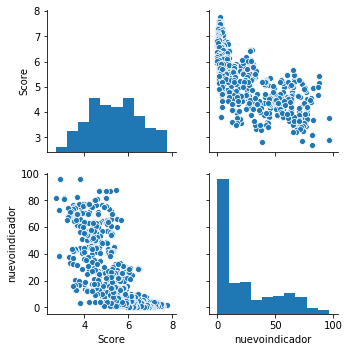

In [119]:
sns.pairplot(df, diag_kind='hist', vars=['Score', 'nuevoindicador'])

## EDA: Estudio y Visualización de los datos

 - Recopilación inici
 al de datos para familiarizarse. Identificación de los problemas debidos a la calidad de los datos
 - Recopilar más datos: número de ejemplos de entrenamiento o nuevas fuentes de datos
 - Visualización de datos
 - Histograma
 - Distribución de los datos (normal, uniforme…)
 - Diagramas de caja o Box Plot
 - Diagrama de dispersión (scatterplot)


In [3]:
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
sns.pairplot(ds_19.drop(columns='Country or region'), hue="Score", palette="husl", diag_kind='hist', vars=['Score', 'GDP per capita', 'Generosity'])

KeyError: "['Country or region'] not found in axis"

In [ ]:
ds_19.hist(column='Score')

In [ ]:
ds_19.drop(columns=['Overall rank', 'Score']).boxplot()

In [ ]:
ds_19.boxplot('Score')

In [ ]:
# Correlation https://towardsdatascience.com/exploratory-data-analysis-eda-visualization-using-pandas-ca5a04271607
corr = ds_19.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

## Preparación de los datos
 - Selección de tablas, de las instancias y atributos. Transformación limpieza de los datos
 - Selección de características: reducir el número de atributos o añadir nuevos atributos
 - Resumen de características/atributos
 - Valores numéricos o nominales
 - Numéricos: Medias, mínimos, máximos,  desviación
 - Nominales: valores permitidos
 - Detección de datos erróneos
 - Análisis de valores atípicos (outliers)
 - Estrategia a seguir con los datos faltantes: Eliminar, inferir…
 - Selección de variables relevantes: Reducción de la dimensionalidad,Construcción de atributos

## Modelado
 - Selección y aplicación de las técnicas de modelado más apropiadas
 - Calibración de los parámetros
 - Determinar el tipo de tarea: Clasificación, regresión, agrupamiento,…
 - Elegir el tipo de modelo: Árboles de decisión, regresión logística, SVM,…
 - Elegir el algoritmo: CART o C5.0
 - Añadir una introducción teórica del modelo utilizado (búsqueda bibliográfica) y los parámetros que dispone



## Evaluación
 - Evaluación de los resultados contrastados con los objetivos de negocio
 - Revisar tema de evaluación de modelos
 - Métricas
 - Costes 


## Despliegue
 - Despliegue del modelo obtenido
 - ¿Cómo lo vais a utilizar una vez creado)
